# Imports

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict 
import timeit
from tqdm import tqdm
from scipy.sparse.csgraph import dijkstra
from scipy.sparse.csgraph import bellman_ford

# Generating weighted graph

In [111]:
N = 100
V = 500
b = np.zeros(shape=(N,N))
upper_triangle = np.triu_indices(N,1)

indexes = np.arange(0, len(upper_triangle[0]))
indexes = np.random.choice(indexes, V, replace=False)

for i in indexes:
    idx1 = upper_triangle[0][i]
    idx2 = upper_triangle[1][i]
    b[idx1,idx2] = np.random.randint(0, 100)

adj_matrix = (b + b.T)

In [112]:
adj_list = defaultdict(list)

for i in range(N):
    for j in range(N):
        adj_list[i].append(j) if adj_matrix[i, j] != 0 else next

In [113]:
num_rows = 2
rand_indexes = np.random.randint(0, N, size=num_rows) 

print('Adjacency matrix rows')
filtered_matrix = adj_matrix[rand_indexes]

for idx in range(num_rows):
    print(f'{rand_indexes[idx]} -> {filtered_matrix[idx]}')

Adjacency matrix rows
61 -> [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0. 46. 21.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. 29.  0.  0.  1.  0.  0.  0.  0.  0.  0. 90.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 97.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
35 -> [ 0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0. 37.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0. 14. 62.  0.  0.  0.  0.  0.  0.  9.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 69.  0.  0.
  0.  0.  0.  0. 47.  0.  0.  0.  0. 58.  0.  0.  0.  0.  0. 81.  0.  0.
  0.  0.  0.  0.  0.  0.  0. 92.  0.  0.  0.  0. 11. 57.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


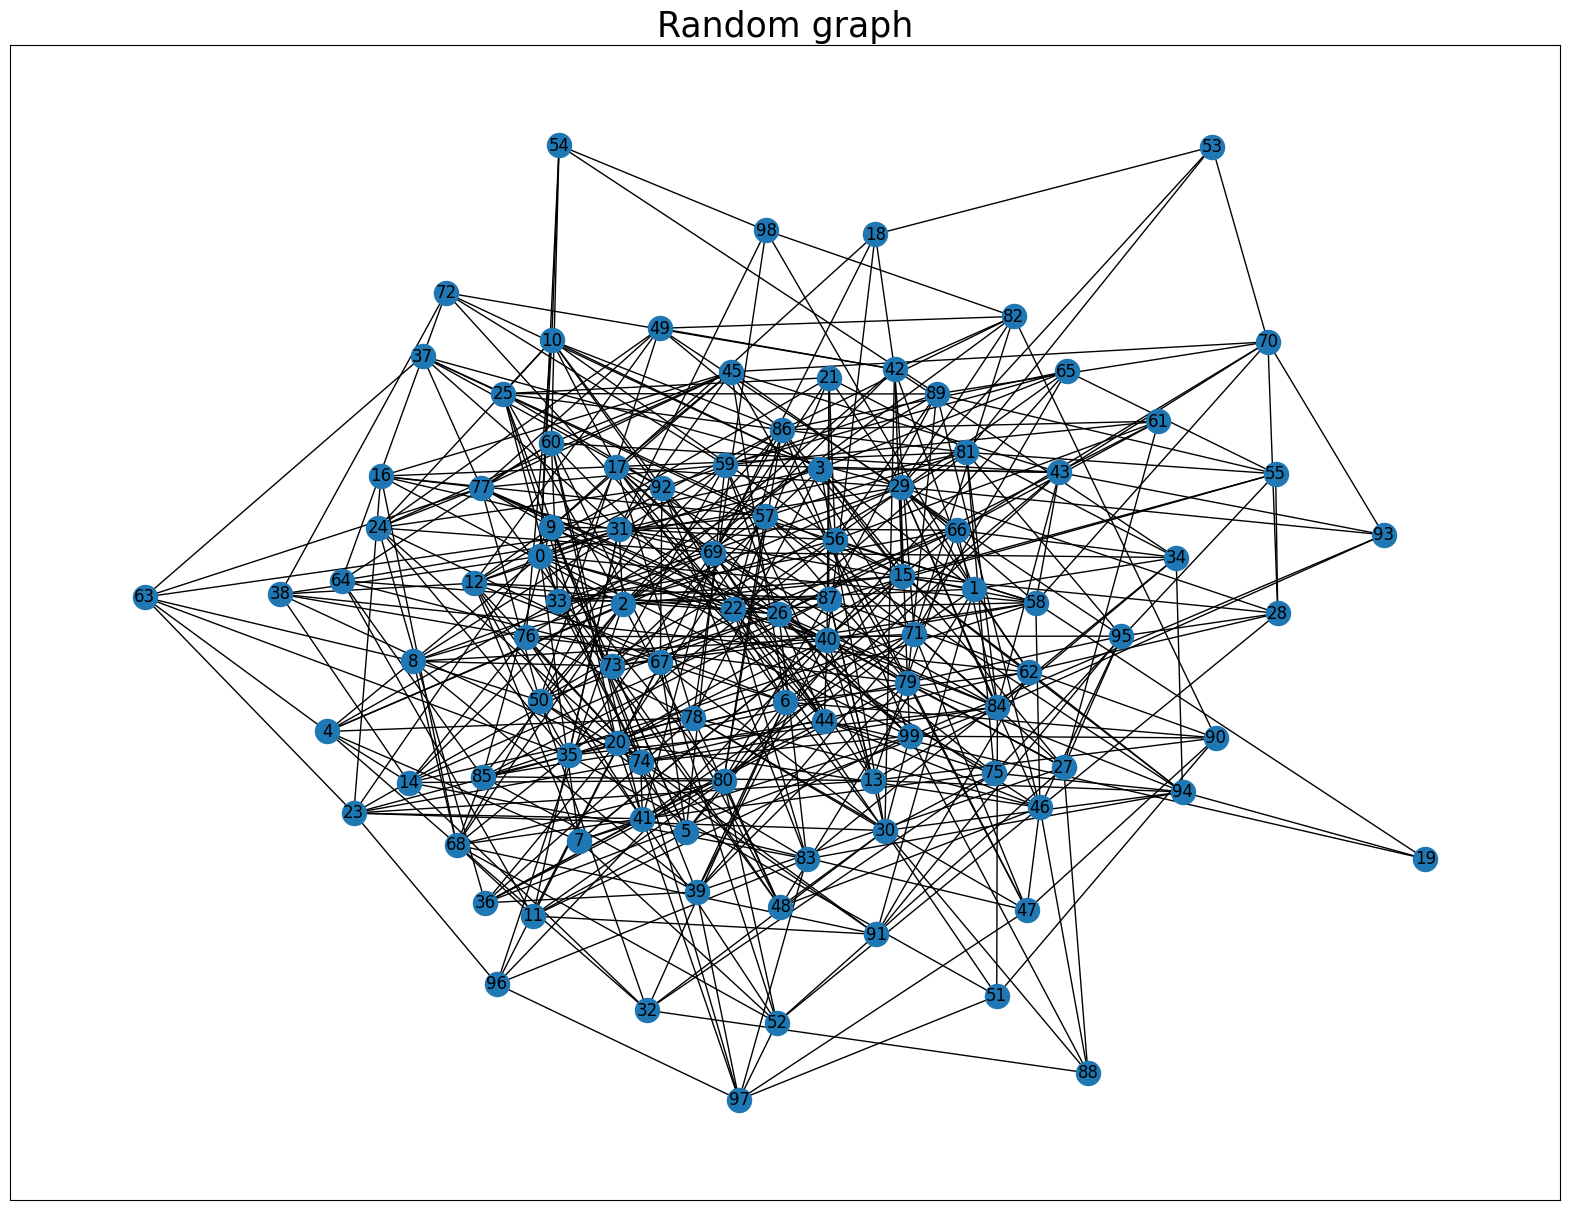

In [114]:
class GraphVisualization:
    def __init__(self, temp):
        self.visual = temp
    def visualize(self):
        G = nx.Graph()
        plt.figure(figsize=(20,15))
        plt.title(f'Random graph', fontsize=25)
        G.add_edges_from(self.visual)
        nx.draw_networkx(G)
        plt.show()


lst = []
for k, v in adj_list.items():
    lst.extend([[k, i] for i in v])
G = GraphVisualization(lst)
G.visualize()

# Functions for execution time eval

In [116]:
def get_execution_time(algorithm, input_array, directed):
    start_time = timeit.default_timer()

    algorithm(input_array, directed)
        
    return timeit.default_timer() - start_time

In [117]:
def get_execution_time_array(algorithm, input_array, directed=False, mean_count=10):
    execution_time_summ = 0
    for m in tqdm(range(mean_count)):
        execution_time_summ += get_execution_time(algorithm, input_array, directed)
        
    execution_time_mean = execution_time_summ / mean_count

    return execution_time_mean

In [118]:
dijkstra_mean_time = get_execution_time_array(dijkstra, adj_matrix)
print("Dijkstra algorithm execution mean time {:.5f}".format(dijkstra_mean_time))

100%|██████████| 10/10 [00:00<00:00, 74.63it/s]

Dijkstra algorithm execution mean time 0.01292


In [120]:
bellman_ford_mean_time = get_execution_time_array(bellman_ford, adj_matrix)
print("Bellman-Ford algorithm execution mean time {:.5f}".format(bellman_ford_mean_time))

100%|██████████| 10/10 [00:01<00:00,  7.30it/s]

Bellman-Ford algorithm execution mean time 0.13393


# Generating initial graph with shape 10*20

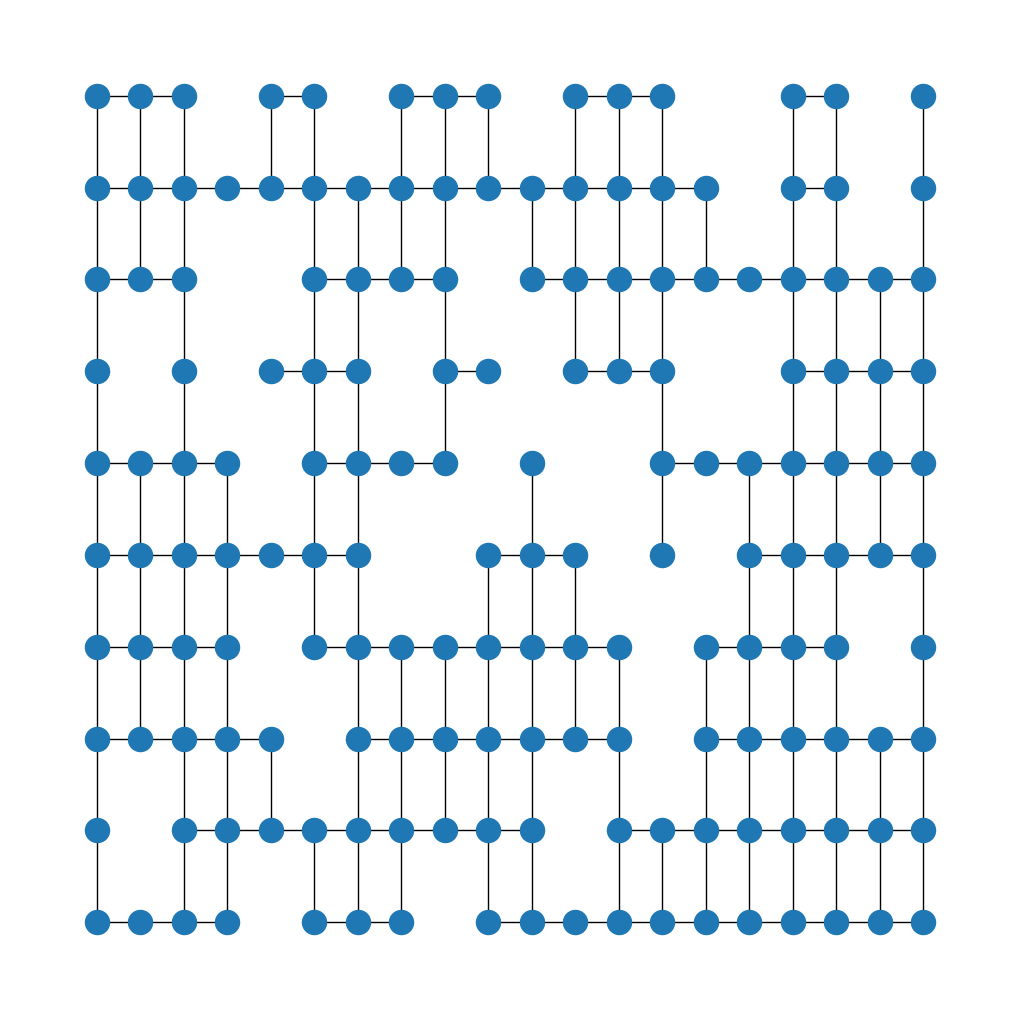

In [121]:
N = 10
M = 20
obstacles_count = 40
obstacles = []

G = nx.grid_2d_graph(N, M)

for i in range(obstacles_count):
    idx1, idx2 = np.random.randint(0,N), np.random.randint(0,M)
    obstacles.append((idx1, idx2))

G.remove_nodes_from(obstacles)

pos = {(x,y):(y,-x) for x,y in G.nodes()}

plt.figure(figsize=(10, 10))
nx.draw(G, pos=pos, with_labels=False)

# Finding shortest path

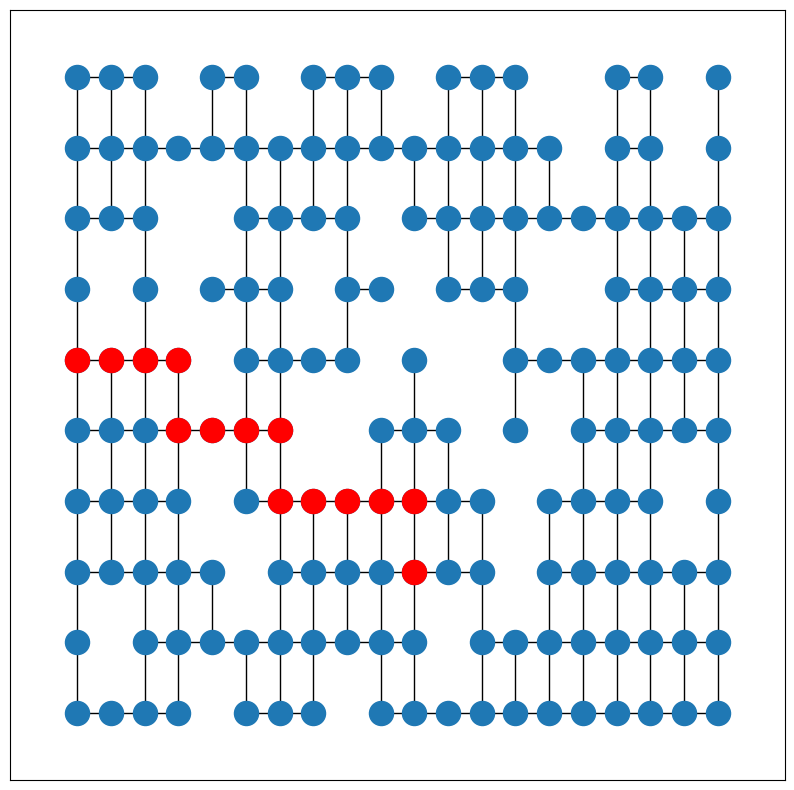

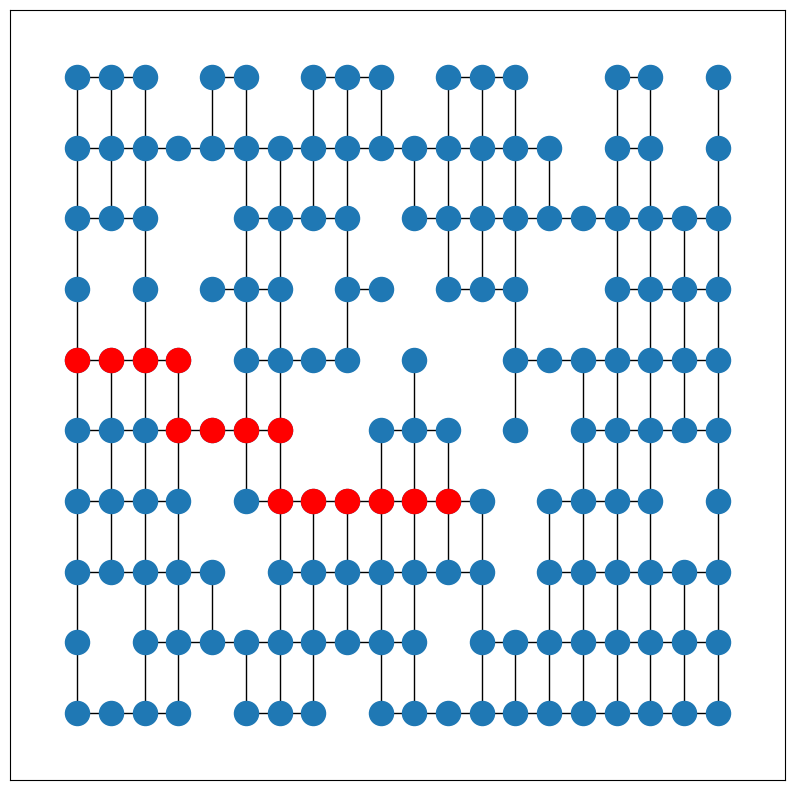

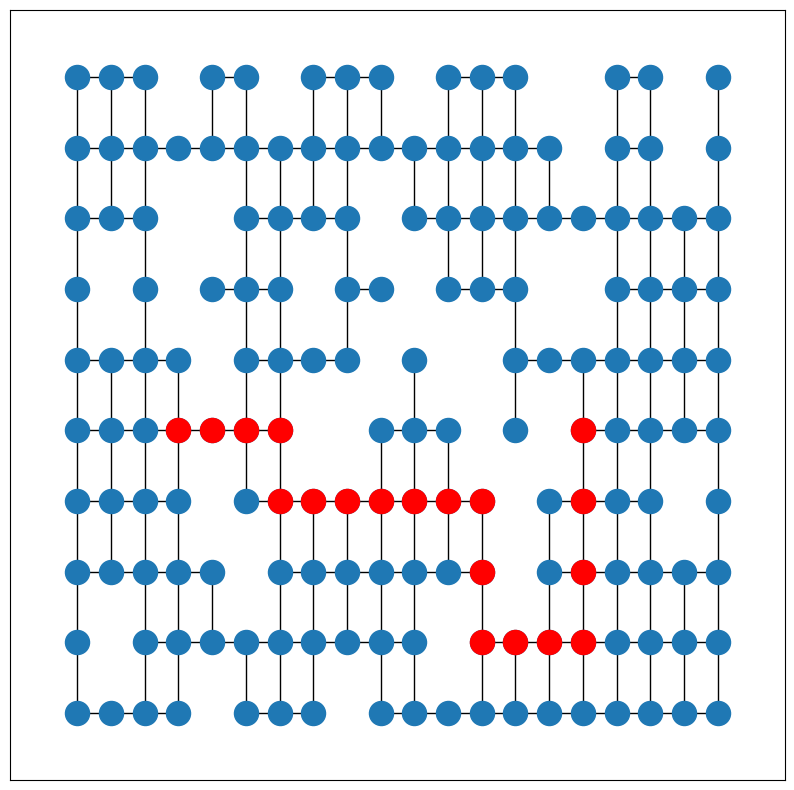

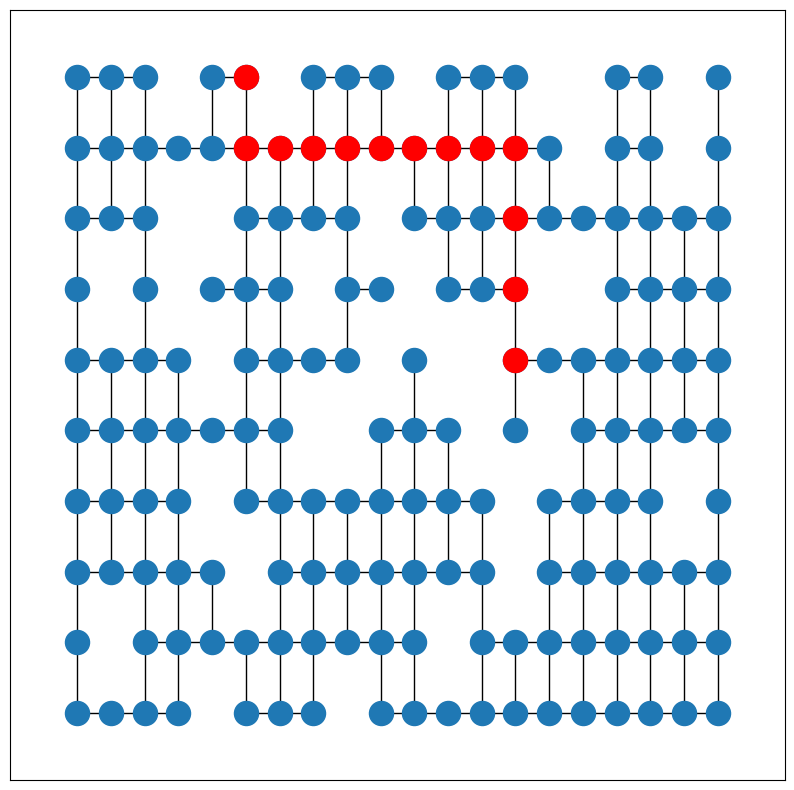

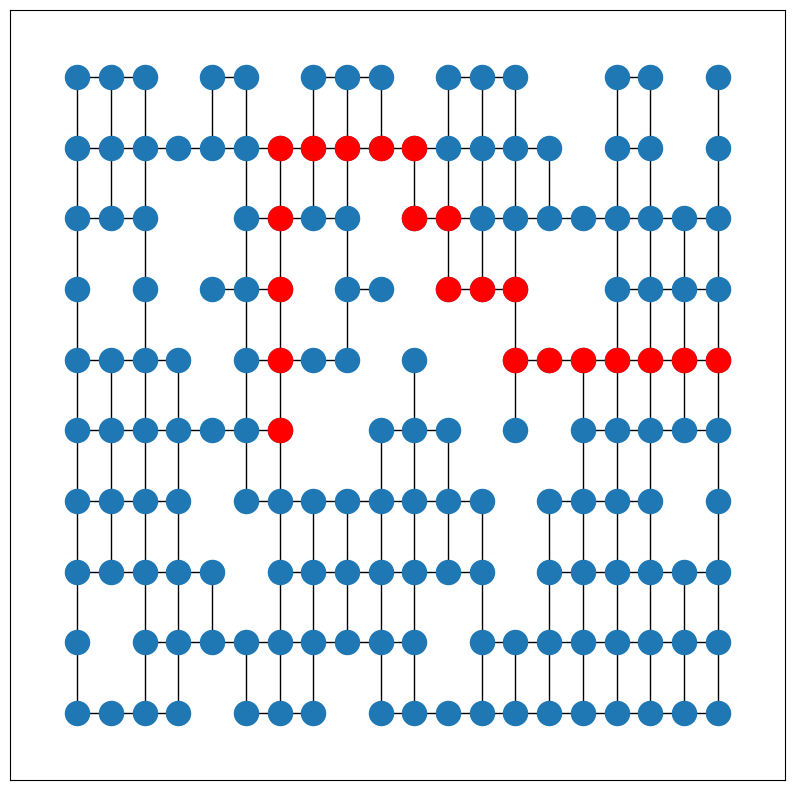

In [122]:
existed_vertixes = list(pos.keys())
for i in range(5):
    plt.figure(figsize=(10, 10))
    nx.draw_networkx(G, pos=pos, with_labels=False)
    idx1, idx2 = np.random.choice(len(pos.keys()), 2)
    start_vertix, dst_vertix = existed_vertixes[idx1], existed_vertixes[idx2]
    try:
        path = nx.algorithms.shortest_paths.astar.astar_path(G, start_vertix, dst_vertix)
    except:
        print(f'Path from {start_vertix} to {dst_vertix} does not exist')
    nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='r')